## Geographic segmentation of Ev based on  sales

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

# Load the dataset
df = pd.read_csv('electric_vehicle_sales_by_state.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Extract year and month for further analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Display the first few rows
print(df.head())


        date   state vehicle_category  electric_vehicles_sold  \
0 2021-04-01  Sikkim       2-Wheelers                       0   
1 2021-04-01  Sikkim       4-Wheelers                       0   
2 2021-05-01  Sikkim       2-Wheelers                       0   
3 2021-05-01  Sikkim       4-Wheelers                       0   
4 2021-06-01  Sikkim       2-Wheelers                       0   

   total_vehicles_sold  year  month  
0                  398  2021      4  
1                  361  2021      4  
2                  113  2021      5  
3                   98  2021      5  
4                  229  2021      6  


In [3]:
# Group by state and sum the electric vehicles sold
state_ev_sales = df.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Sort states by total EV sales in descending order
state_ev_sales = state_ev_sales.sort_values(by='electric_vehicles_sold', ascending=False)

# Display the aggregated data
print(state_ev_sales)


                       state  electric_vehicles_sold
20               Maharashtra                  396045
16                 Karnataka                  312995
30                Tamil Nadu                  200062
11                   Gujarat                  181389
28                 Rajasthan                  150366
17                    Kerala                  137060
9                      Delhi                  107312
32             Uttar Pradesh                   95203
19            Madhya Pradesh                   78979
25                    Odisha                   78267
2             Andhra Pradesh                   77422
7               Chhattisgarh                   53804
5                      Bihar                   31019
12                   Haryana                   30797
34               West Bengal                   30560
27                    Punjab                   23833
10                       Goa                   19684
15                 Jharkhand                  

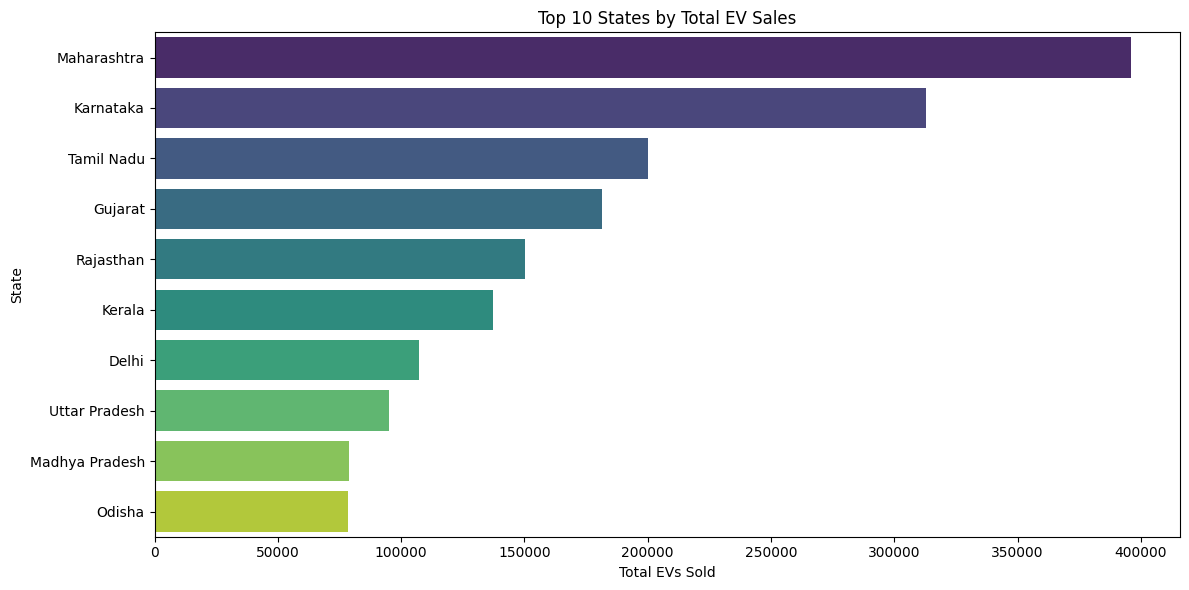

In [ ]:
import seaborn as sns

# Select top 10 states
top_states = state_ev_sales.head(10)

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(x='electric_vehicles_sold', y='state', data=top_states, palette='viridis')

# Set plot titles and labels
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('Total EVs Sold')
plt.ylabel('State')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:


# Load dataset
df = pd.read_csv('electric_vehicle_sales_by_state.csv')

# Preview the data
print(df.head())


        date   state vehicle_category  electric_vehicles_sold  \
0  01-Apr-21  Sikkim       2-Wheelers                       0   
1  01-Apr-21  Sikkim       4-Wheelers                       0   
2  01-May-21  Sikkim       2-Wheelers                       0   
3  01-May-21  Sikkim       4-Wheelers                       0   
4  01-Jun-21  Sikkim       2-Wheelers                       0   

   total_vehicles_sold  
0                  398  
1                  361  
2                  113  
3                   98  
4                  229  


In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# View unique vehicle types
print("Unique vehicle types:", df['vehicle_category'].unique())


Unique vehicle types: ['2-Wheelers' '4-Wheelers']


In [7]:
# Filter each vehicle type
two_wheelers = df[df['vehicle_category'] == '2-Wheelers']

four_wheelers = df[df['vehicle_category'] == '4-Wheelers']


In [8]:
# Aggregate for each vehicle type
two_w_state = two_wheelers.groupby('state')['electric_vehicles_sold'].sum().reset_index()

four_w_state = four_wheelers.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Sort for visualization
two_w_state = two_w_state.sort_values(by='electric_vehicles_sold', ascending=False)

four_w_state = four_w_state.sort_values(by='electric_vehicles_sold', ascending=False)


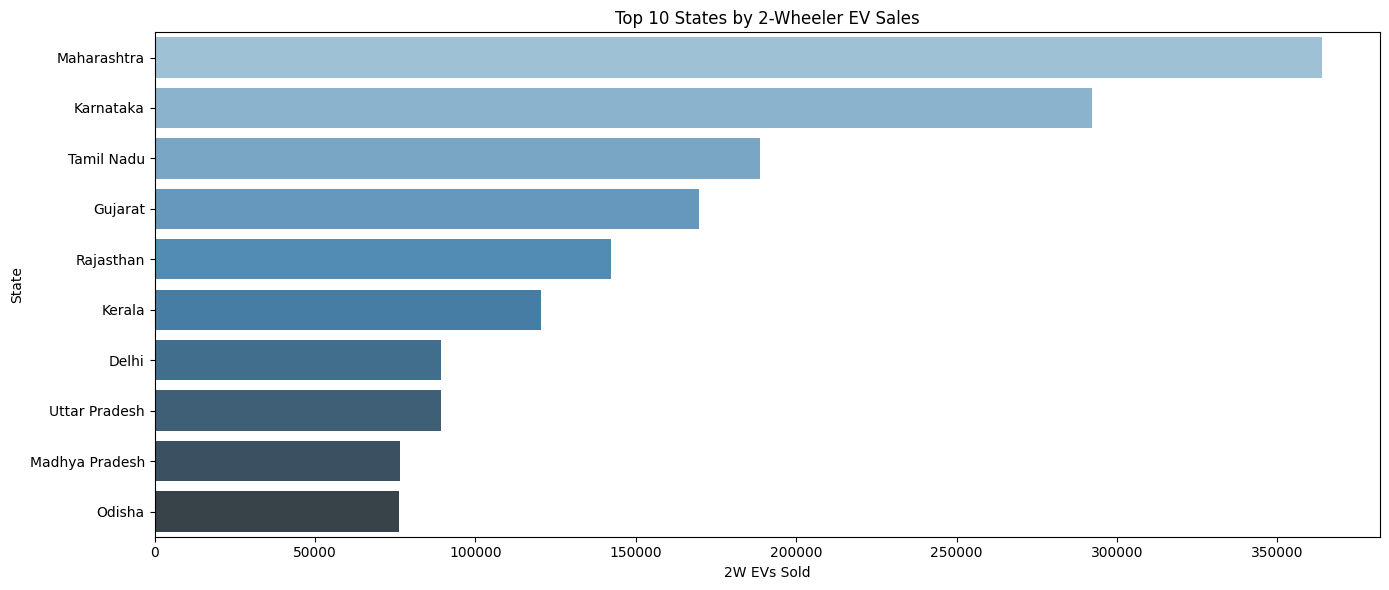

In [9]:
# Set the plot size
plt.figure(figsize=(14, 6))
sns.barplot(x='electric_vehicles_sold', y='state', data=two_w_state.head(10), palette='Blues_d')
plt.title('Top 10 States by 2-Wheeler EV Sales')
plt.xlabel('2W EVs Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()

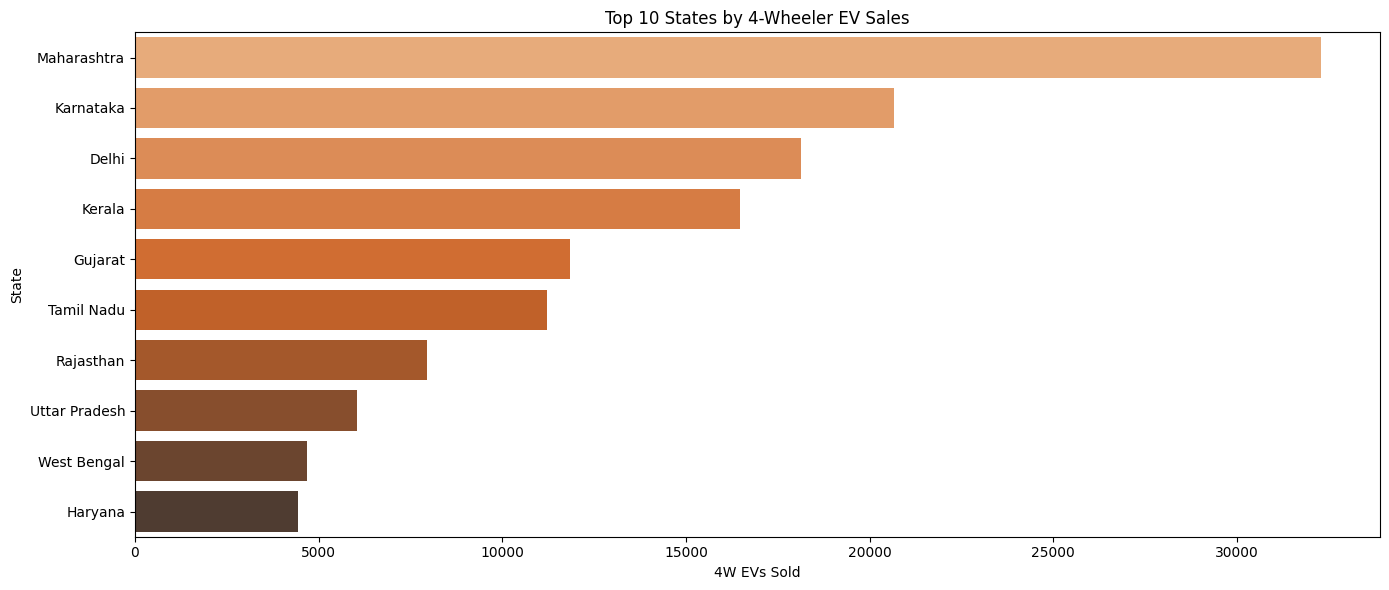

In [10]:
plt.figure(figsize=(14, 6))
sns.barplot(x='electric_vehicles_sold', y='state', data=four_w_state.head(10), palette='Oranges_d')
plt.title('Top 10 States by 4-Wheeler EV Sales')
plt.xlabel('4W EVs Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [12]:
# Combine data into a pivot table
pivot_df = df.groupby(['state', 'vehicle_category'])['electric_vehicles_sold'].sum().reset_index()

# Pivot table to get separate columns for 2W, 3W, 4W
pivot_df = pivot_df.pivot(index='state', columns='vehicle_category', values='electric_vehicles_sold').fillna(0)

# Rename columns for clarity
pivot_df.columns = ['2W', '4W']

# Reset index to make 'state' a column
pivot_df.reset_index(inplace=True)

# View the resulting DataFrame
print(pivot_df.head())


                      state     2W    4W
0         Andaman & Nicobar      2     0
1  Andaman & Nicobar Island     35    43
2            Andhra Pradesh  74099  3323
3         Arunachal Pradesh      4    29
4                     Assam   5963   455


In [ ]:


# Extract only numerical features
X = pivot_df[['2W', '4W']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

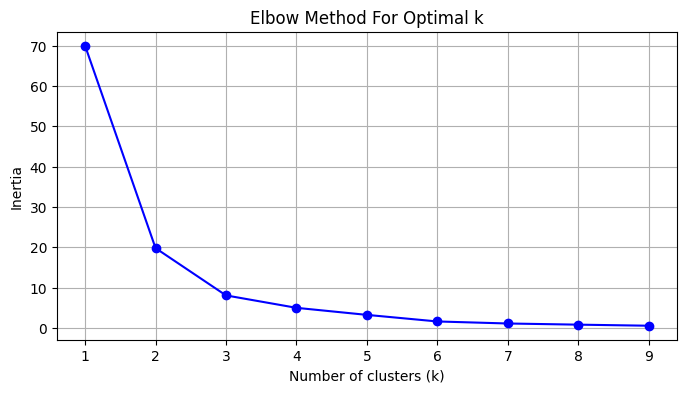

In [ ]:

# Try different values of k
inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [15]:
#  k=4 based on elbow curve
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_scaled)

# View the clusters
print(pivot_df[['state', '2W', '4W', 'cluster']])


                       state      2W     4W  cluster
0          Andaman & Nicobar       2      0        3
1   Andaman & Nicobar Island      35     43        3
2             Andhra Pradesh   74099   3323        0
3          Arunachal Pradesh       4     29        3
4                      Assam    5963    455        3
5                      Bihar   30020    999        3
6                 Chandigarh    3654   1625        3
7               Chhattisgarh   51889   1915        0
8                 DNH and DD     281     74        3
9                      Delhi   89178  18134        2
10                       Goa   17634   2050        3
11                   Gujarat  169557  11832        2
12                   Haryana   26355   4442        0
13          Himachal Pradesh    2351    244        3
14         Jammu and Kashmir    5723    248        3
15                 Jharkhand   17686    775        3
16                 Karnataka  292329  20666        1
17                    Kerala  120593  16467   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


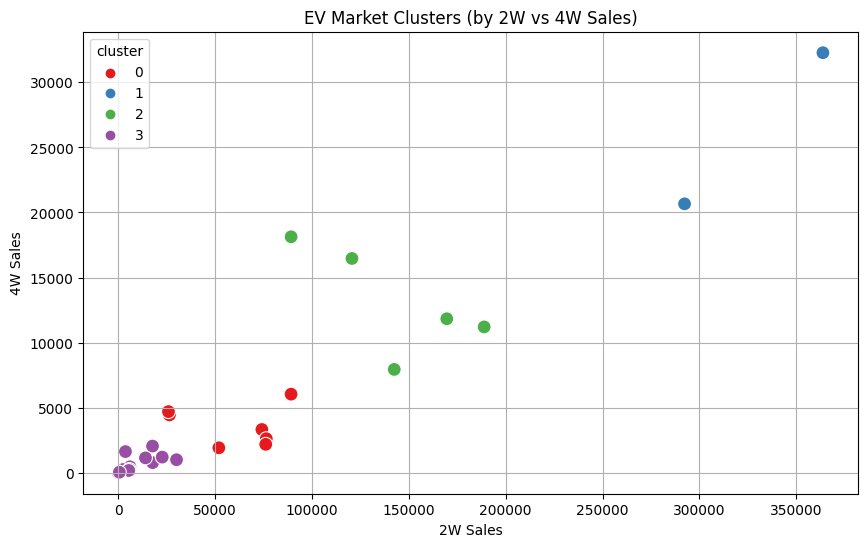

In [ ]:


# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pivot_df, x='2W', y='4W', hue='cluster', palette='Set1', s=100)
plt.title('EV Market Clusters (by 2W vs 4W Sales)')
plt.xlabel('2W Sales')
plt.ylabel('4W Sales')
plt.grid(True)
plt.show()


✅ Cluster Interpretation


Cluster 0 (🔴): Low Adoption – Low 2W & 4W sales; early-stage EV regions.

Cluster 1 (🔵): High Adoption – Strong 2W & 4W sales; developed EV markets.

Cluster 2 (🟢): Moderate Adoption – High 2W, mid 4W sales; Tier-2 focused.

Cluster 3 (🟣): Emerging – Very low sales; future potential.



# Geographic segmenation of ev  based on ev chargers & stations

In [4]:
# Load EV charger dataset
charger_df = pd.read_csv('D:/Ev_Market_segmentation/1_ev_charger_dataset.csv')

# Load EV charging station dataset (Table 4 sheet)
station_df = pd.read_excel('D:/Ev_Market_segmentation/2_ev_charging_station_dataset.xlsx', sheet_name='Table 4', skiprows=1, usecols=[0,1], names=['State','Charging_Stations'])

# Load EV sales dataset
sales_df = pd.read_csv('D:/Ev_Market_segmentation/electric_vehicle_sales_by_state.csv')

## Cleaning and Aggregating Sales Data

In [5]:
# Aggregate total EV sales by state
sales_by_state = sales_df.groupby('state', as_index=False)['electric_vehicles_sold'].sum()
sales_by_state.rename(columns={'state':'State','electric_vehicles_sold':'Total_EV_Sales'}, inplace=True)

In [6]:
# updated sales data of ev
sales_by_state = pd.read_csv('D:/Ev_Market_segmentation/electric_vehicle_sales_by_state_updated.csv')
sales_by_state = sales_by_state.drop_duplicates(subset='State',keep='first')
sales_by_state.head()

,State,Total_EV_Sales
0,Andaman & Nicobar,2
1,Andaman & Nicobar Island,78
2,Andhra Pradesh,77422
3,Arunachal Pradesh,33
4,Assam,6418


### Fixing the column names of different datasets and also the state names

In [7]:
# 1. Rename Region/state columns to a common 'State'
charger_df.rename(columns={'Region':'State'}, inplace=True)
station_df.rename(columns={'State/UT':'State'}, inplace=True)
sales_by_state.rename(columns={'state':'State'}, inplace=True)

# 2. List of all unique states in your sales data
states = [
    'Andaman & Nicobar', 'Andaman & Nicobar Island', 'Andhra Pradesh',
    'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
    'DNH and DD', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
    'Himachal Pradesh', 'Jammu and K', 'Jammu and Kashmir', 'Jharkhand',
    'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
    'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
    'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Telangana'
]

# 3. Build fixes dict mapping each to itself, plus any typo corrections
fixes = {state: state for state in states}
fixes.update({
    'Maharastra':   'Maharashtra',
    'Chandigadh':   'Chandigarh',
    # if you spot more variants, add them here
})

# 4. Apply the same fixes across all three DataFrames
for df in (charger_df, station_df, sales_by_state):
    df['State'] = df['State'].str.strip().replace(fixes)

In [50]:
charger_df.head()

,State,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharashtra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [11]:
station_df.head()

,State,Charging_Stations
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [12]:
sales_by_state.head()

,State,Total_EV_Sales
0,Andaman & Nicobar,2
1,Andaman & Nicobar Island,78
2,Andhra Pradesh,77422
3,Arunachal Pradesh,33
4,Assam,6418


## Merge Datasets

In [8]:
# Merge sales and charger
merged_df = sales_by_state.merge(charger_df[['State','Chargers']], on='State', how='inner')

# Merge station data
merged_df = merged_df.merge(station_df, on='State', how='inner')

# Show merged dataframe
merged_df

,State,Total_EV_Sales,Chargers,Charging_Stations
0,Andhra Pradesh,77422,266,65
1,Assam,6418,20,19
2,Bihar,31019,37,26
3,Chandigarh,5279,65,4
4,Chhattisgarh,53804,25,51
5,Delhi,107312,72,66
6,Gujarat,181389,228,87
7,Haryana,30797,50,114
8,Himachal Pradesh,2595,10,13
9,Karnataka,312995,172,100


## Absolute Metrics


In [9]:
absolute = merged_df[['State','Total_EV_Sales','Chargers','Charging_Stations']]
absolute.head()

,State,Total_EV_Sales,Chargers,Charging_Stations
0,Andhra Pradesh,77422,266,65
1,Assam,6418,20,19
2,Bihar,31019,37,26
3,Chandigarh,5279,65,4
4,Chhattisgarh,53804,25,51


In [10]:
features = merged_df[['Total_EV_Sales','Chargers','Charging_Stations']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


inertia = []
ks = range(1, 13)
for k in ks:
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_)

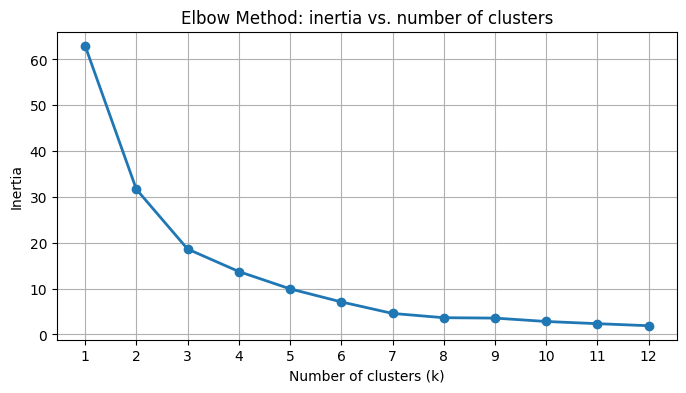

In [11]:
plt.figure(figsize=(8,4))
plt.plot(ks, inertia, 'o-', linewidth=2, markersize=6)
plt.title("Elbow Method: inertia vs. number of clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(ks)
plt.grid(True)
plt.show()

In [12]:

kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
merged_df['cluster'] = kmeans.labels_

In [13]:
cluster_states = merged_df.groupby('cluster')['State'].apply(list)
for c, states in cluster_states.items():
    print(f"Cluster {c}:", ", ".join(states))

Cluster 0: Delhi, Haryana, West Bengal, Telangana
Cluster 1: Karnataka, Maharashtra
Cluster 2: Assam, Bihar, Chandigarh, Chhattisgarh, Himachal Pradesh, Kerala, Meghalaya, Odisha, Uttarakhand
Cluster 3: Andhra Pradesh, Gujarat, Madhya Pradesh, Rajasthan, Tamil Nadu, Uttar Pradesh


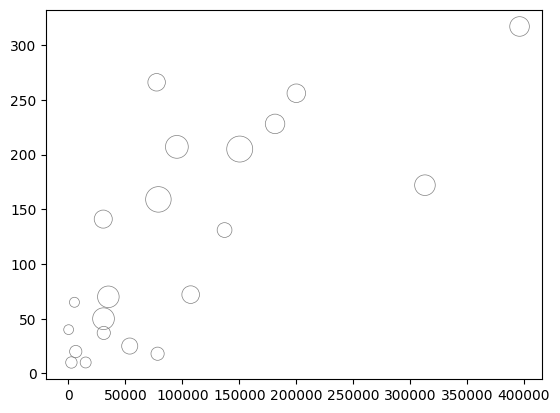

In [14]:
# use bubble‐size for stations
sizes = (merged_df['Charging_Stations'] - merged_df['Charging_Stations'].min()) \
        / (merged_df['Charging_Stations'].max() - merged_df['Charging_Stations'].min())
plt.scatter(
    merged_df['Total_EV_Sales'],
    merged_df['Chargers'],
    s = sizes * 300 + 50,  # scale into a reasonable range
    c='none',
    edgecolor='gray',
    linewidth=0.5
)

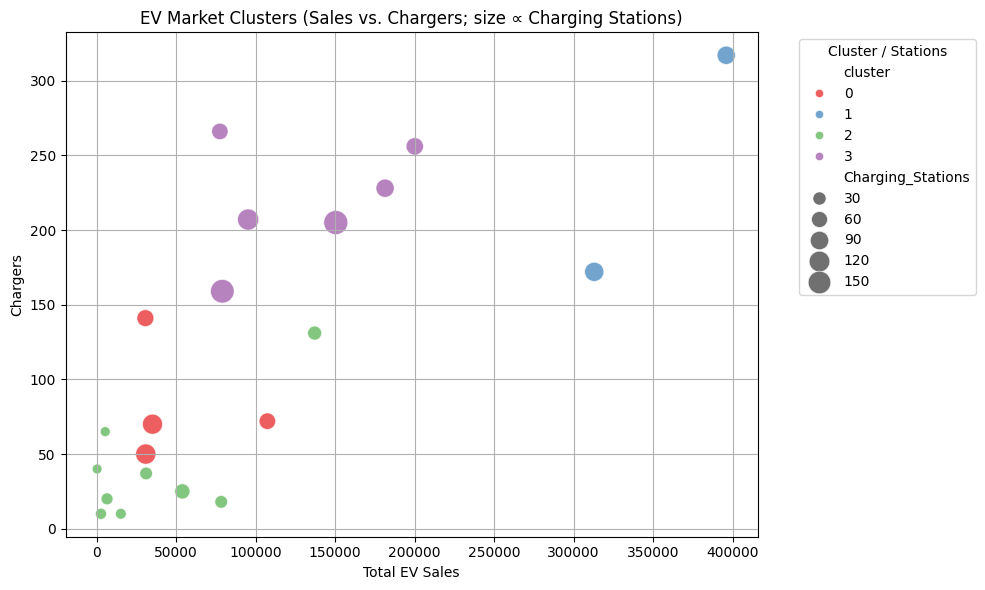

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Total_EV_Sales',
    y='Chargers',
    hue='cluster',
    size='Charging_Stations',        # bubble size for  stations
    sizes=(50, 300),                 # min & max bubble size
    palette='Set1',
    alpha=0.7
)
plt.title('EV Market Clusters (Sales vs. Chargers; size ∝ Charging Stations)')
plt.xlabel('Total EV Sales')
plt.ylabel('Chargers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster / Stations')
plt.grid(True)
plt.tight_layout()
plt.show()

### Cluster 0 🔴 Growth Hubs  
**Profile:** Mid sales (30–100k), fewer chargers (50–140), small–mid stations  
**Action:** Ramp up fast-charger deployments to meet rising demand  

**States:**  
- Delhi,Haryana  
- West Bengal,Telangana

### Cluster 1 🔵 Leaders  
**Profile:** Very high sales (320–400k), dense chargers (170–320), mid–large stations  
**Action:** Use as innovation testbeds (V2G, ultra-fast, smart-charging)  

**States:**  
- Maharashtra,Karnataka  


### Cluster 2 🟢 Emerging  
**Profile:** Low sales (<20k), sparse chargers (<40), tiny station footprint  
**Action:** Run awareness campaigns and pilot small-scale chargers  

**States:**  
- Assam,Bihar,Chandigarh,Chattisgarh,Himachal Pradesh 
- Kerala, Meghalaya, Odisha, Uttarakhand 


### Cluster 3 🟣 Developing  
**Profile:** Mid sales (80–200k), high chargers (160–260), large stations  
**Action:** Boost demand via incentives and targeted marketing  

**States:**  
- Andhra Pradesh ,Gujarat, Madhya Pradesh,
- Rajasthan,Tamil Nadu,Uttar Pradesh
